<a href="https://colab.research.google.com/github/MSGanga/MSGanga/blob/main/Task7_KNN_on_Social_Media_Ads_Assignment_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [940]:
#Social_Networks_Ads.csv
url = '/content/Social_Network_Ads.csv'

**Importing the libraries**

In [941]:
# Importing the necessary modules.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [942]:
import warnings
warnings.filterwarnings("ignore")

**Importing the dataset**

In [943]:
# Loading the dataset
df = pd.read_csv(url)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [944]:
# Configuration of the DataFrame.
df.shape

(400, 5)

In [945]:
# Information of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [946]:
# Descriptive statistics of the Dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [947]:
# Checking for duplicate rows.
df.duplicated().sum()

0

In [948]:
# Checking for missing values.
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [949]:
# Count of values in 'Purchased' column
print(f"Count of values in 'Purchased' column:\n{Counter(df.Purchased)}")

Count of values in 'Purchased' column:
Counter({0: 257, 1: 143})


In [950]:
# Compute a simple cross-tabulation of two (or more) factors. 
# By default computes a frequency table of the factors 
pd.crosstab(df.Gender,df.Purchased)

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


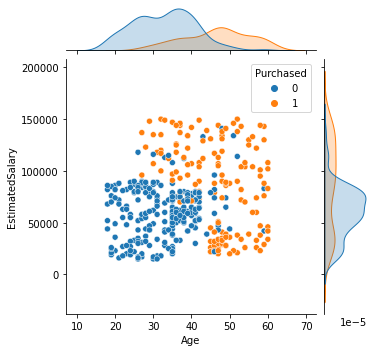

In [951]:
# jointplot()
sns.jointplot(x='Age',y='EstimatedSalary', hue = 'Purchased', data=df, height=5, kind= 'scatter')
plt.show()

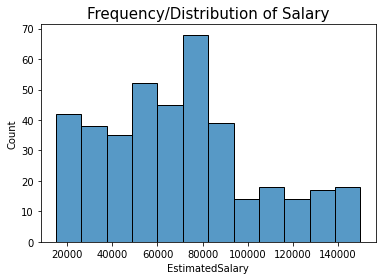

In [952]:
# Checking the distribution of the salary
plt.title("Frequency/Distribution of Salary",fontsize=15)
sns.histplot(data=df, x='EstimatedSalary')
# or sns.histplot(df,EstimatedSalary)
plt.show()

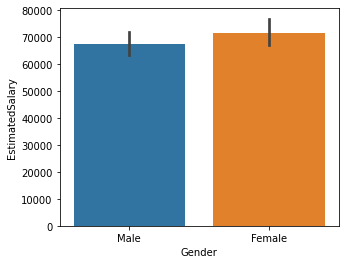

In [953]:
# barplot(Categorical estimate plot)
plt.figure(figsize=(5,4))
sns.barplot(x=df.Gender,y=df.EstimatedSalary)
plt.show()

**Splitting the dataset into the Training set and Test set**

In [954]:
# Creating dummies for 'Gender' column.
df=pd.get_dummies(data=df,columns=['Gender'],drop_first=True)
df.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [955]:
# Splitting the dataset into Training Dataset and Testing Dataset.
y=df.Purchased
X=df.drop(['User ID', 'Purchased'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=1,stratify=df['Purchased'])

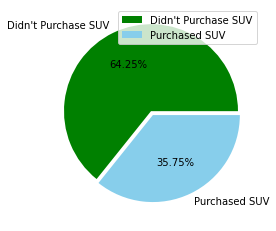

In [956]:
# Piechart w.r.t 'Purchased' column
label=["Didn't Purchase SUV","Purchased SUV"]
mycolors = ["green", "skyblue"]
myexplode = [0.05, 0]
z=df.Purchased.value_counts()
plt.pie(z,autopct="%.2f%%",labels=label, 
        explode=myexplode, colors = mycolors)
plt.legend()
plt.show()

In [957]:
# Over-sampling using SMOTE 
smt = SMOTE(sampling_strategy=1,random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)
print(f'Resampled dataset shape:\n{Counter(y_train)}')

Resampled dataset shape:
Counter({0: 172, 1: 172})


**Feature Scaling**

In [958]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Fitting K-NN to the Training set**

In [959]:
# Building a KNN Classifier Model.
model = KNeighborsClassifier(n_neighbors = 5, p = 2)
model.fit(X_train, y_train)

KNeighborsClassifier()

**Predicting the Test set results**

In [960]:
# Making the Model predict
y_pred = model.predict(X_test)

In [961]:
# Actual and Predicted values of target variable.
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result.head()

,Actual,Predicted
163,0,0
264,1,1
106,0,0
273,1,1
52,0,0


**Making the Confusion Matrix**

In [962]:
# Confusion Matrix
print('Confusion Matrix of the KNN Classifier Model:\n')
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Confusion Matrix of the KNN Classifier Model:

[[77  8]
 [ 4 43]]


In [963]:
# Accuracy Score
print('Accuracy of the KNN Classifier Model is:', round(accuracy_score(y_test, y_pred),3))

Accuracy of the KNN Classifier Model is: 0.909


In [964]:
# Classification Report
print('Classification Report of the KNN Classifier Model:\n') 
print(classification_report(y_test, y_pred))

Classification Report of the KNN Classifier Model:

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        85
           1       0.84      0.91      0.88        47

    accuracy                           0.91       132
   macro avg       0.90      0.91      0.90       132
weighted avg       0.91      0.91      0.91       132



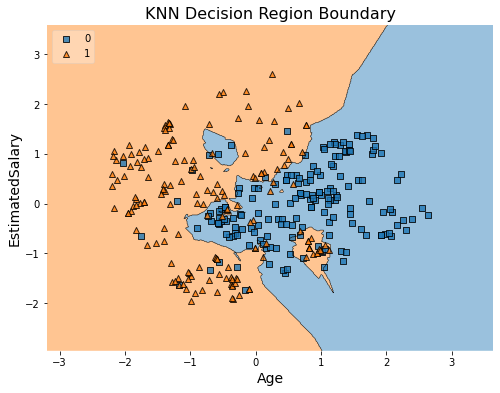

In [965]:
# Decision Boundary
# Visualizing the Train set results
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
plt.figure(figsize=(8,6))
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
model.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train.values, clf=model, legend=2)
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('KNN Decision Region Boundary', size=16)
plt.show()

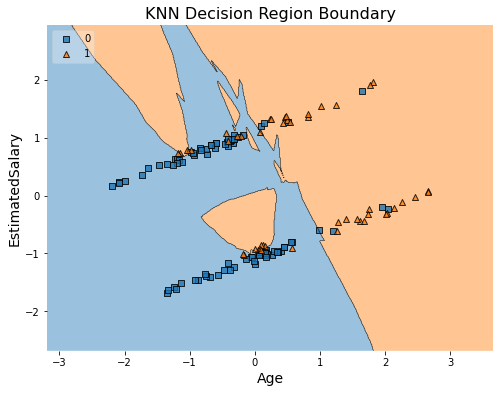

In [966]:
# Decision Boundary
# Visualizing the Test set results
plt.figure(figsize=(8,6))
pca = PCA(n_components = 2)
X_test2 = pca.fit_transform(X_test)
model.fit(X_test2, y_test)
plot_decision_regions(X_test2, y_test.values, clf=model, legend=2)
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('KNN Decision Region Boundary', size=16)
plt.show()